In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://drive.google.com/file/d/1NLS6-YCjx9ck-E76rERyUWqnIF-uBfC2/view?usp=sharing'

In [ ]:
dataset_url='https://drive.google.com/uc?id=' + url.split('/')[-2]

In [ ]:
df = pd.read_csv(dataset_url)

In [ ]:
# 4 Выявление пустых ячеек

<Axes: >

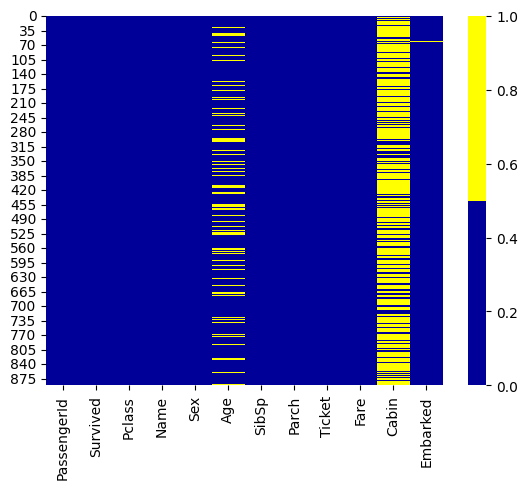

In [ ]:
cols = df.columns[0:]
# визуализация пропущенных значений: желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
df.isnull().sum() # Количество пропущенных значений

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         0
dtype: int64

In [ ]:
# Процент пропущенных значений по каждой колонке
for col in df.columns:
    perc_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(perc_missing*100)))

PassengerId - 0%
Survived - 0%
Pclass - 0%
Name - 0%
Sex - 0%
Age - 20%
SibSp - 0%
Parch - 0%
Ticket - 0%
Fare - 0%
Cabin - 77%
Embarked - 0%


In [ ]:
# 5 Замена или удаление пустых значений

In [ ]:
# Для колонок Age применим замену пустых значений медианным значением, так как она устойчива к выбросам
# Для колонок Cabin применим замену пустых значений значением None
# Для колонок Embarked применим замену пустых значений модой
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].fillna('None')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

In [ ]:
# 7 Аналитика

In [ ]:
# Здесь предсталены минимальные и максимальные значения по колонкам
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Здесь предсталены количество уникальных значений по колонкам
for col in df.columns:
    uniq_val = df[col].nunique()
    print('{} - {}'.format(col, uniq_val))

PassengerId - 889
Survived - 2
Pclass - 3
Name - 889
Sex - 2
Age - 88
SibSp - 7
Parch - 7
Ticket - 680
Fare - 247
Cabin - 147
Embarked - 3


In [ ]:
# 8 Влияние признаков

<ipython-input-87-4cc9dc4b63c3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr(method=coef_corr)


(7.5, -0.5)

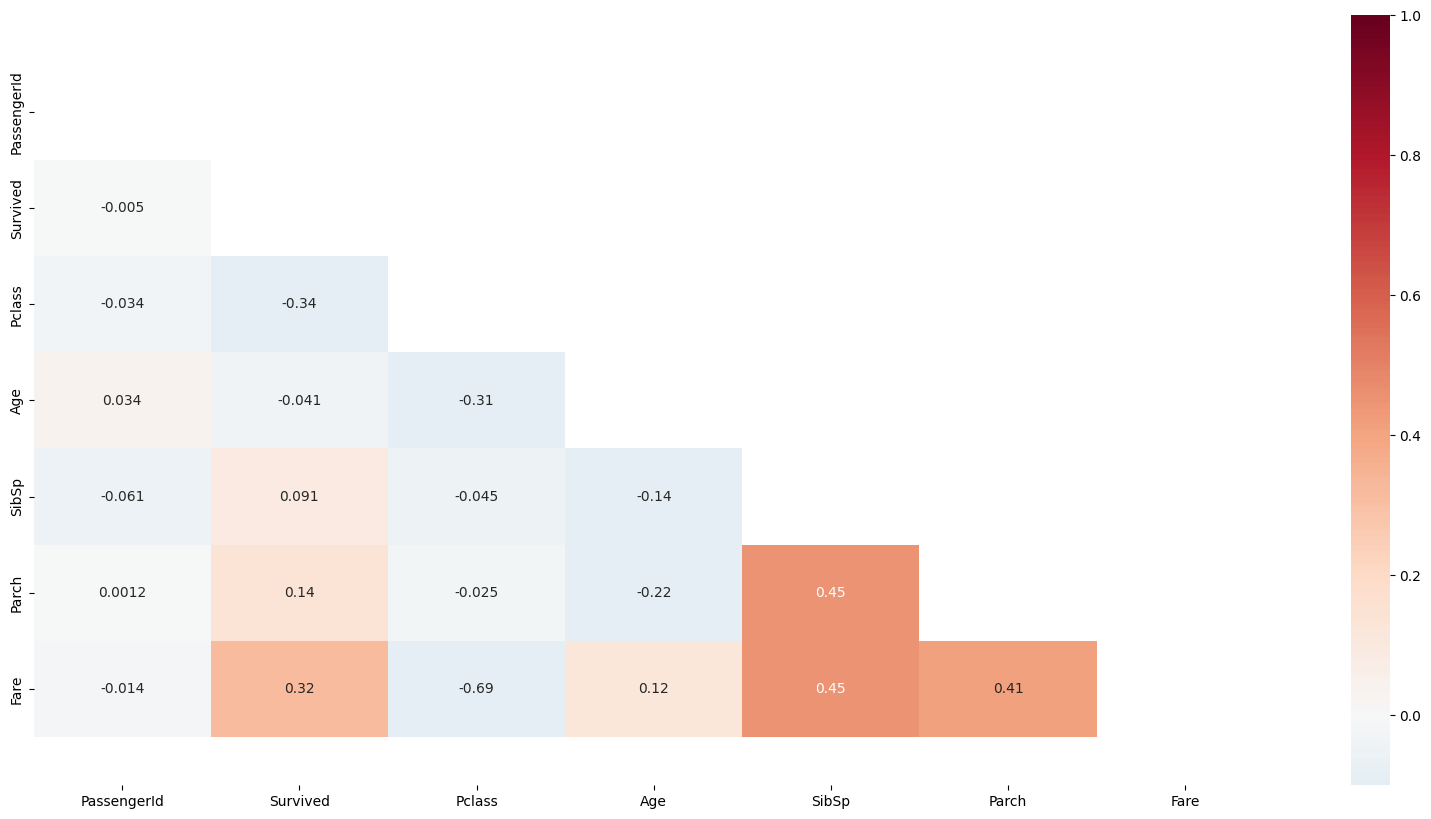

In [ ]:
coef_corr = 'spearman'
plt.figure(figsize=(20,10))
c= df.corr(method=coef_corr)
matrix = np.triu(c)
ax = sns.heatmap(c,cmap='RdBu_r',annot=True, mask=matrix, vmin=-0.1, vmax=1, center= 0)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)